# Statsmodels
statsmodels is a Python module that provides classes and functions for 
1. **the estimation of many different statistical models**, 
2. as well as for **conducting statistical tests**, and 
3. **statistical data exploration**. 

An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at www.statsmodels.org.

## Linear Regression Models
### Ordinary Least Squares


In [3]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(20190314)
# initialization 

In [60]:
# create artificial data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 1, 10])
e = np.random.normal(size=nsample) # noise or measurement error

In [61]:
X = sm.add_constant(X) # add a column of 1 for intercept
y = np.dot(X, beta) + e # response with noise
print(X[:5,:])

[[1.         0.         0.        ]
 [1.         0.1010101  0.01020304]
 [1.         0.2020202  0.04081216]
 [1.         0.3030303  0.09182736]
 [1.         0.4040404  0.16324865]]


In [33]:
# fit by OLS 
model = sm.OLS(y, X) #create model
results = model.fit() # fit model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.550e+06
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          7.00e-242
Time:                        19:18:00   Log-Likelihood:                -141.20
No. Observations:                 100   AIC:                             288.4
Df Residuals:                      97   BIC:                             296.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8332      0.297      2.810      0.0

In [34]:
print(dir(results))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [35]:
print('Parameters: ', results.params)  # Get specific statistics
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  [0.83322162 1.06311304 9.99506969]
R2:  0.9999893404142203
Standard errors:  [0.29655626 0.13706098 0.01326263]
Predicted values:  [8.33221617e-01 1.04258687e+00 1.45591233e+00 2.07319799e+00
 2.89444385e+00 3.91964992e+00 5.14881618e+00 6.58194265e+00
 8.21902932e+00 1.00600762e+01 1.21050833e+01 1.43540505e+01
 1.68069780e+01 1.94638657e+01 2.23247136e+01 2.53895217e+01
 2.86582899e+01 3.21310184e+01 3.58077071e+01 3.96883560e+01
 4.37729651e+01 4.80615344e+01 5.25540639e+01 5.72505536e+01
 6.21510035e+01 6.72554136e+01 7.25637839e+01 7.80761144e+01
 8.37924051e+01 8.97126560e+01 9.58368671e+01 1.02165038e+02
 1.08697170e+02 1.15433262e+02 1.22373314e+02 1.29517326e+02
 1.36865298e+02 1.44417231e+02 1.52173123e+02 1.60132976e+02
 1.68296789e+02 1.76664563e+02 1.85236296e+02 1.94011990e+02
 2.02991644e+02 2.12175258e+02 2.21562832e+02 2.31154367e+02
 2.40949862e+02 2.50949317e+02 2.61152732e+02 2.71560107e+02
 2.82171443e+02 2.92986738e+02 3.04005994e+02 3.15229210e+02
 3

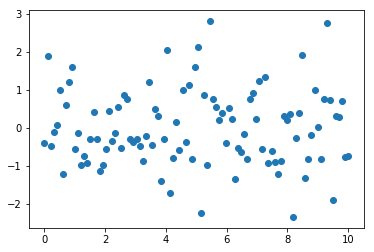

In [45]:
plt.scatter(x,results.predict()-y)

# How to interpret the summary?
### The left part of the first table provides **basic information** about the model fit:

Element|Description
-:|:-:
Dep. Variable|Which variable is the response in the model 
Model|What model you are using in the fit 
Method|How the parameters of the model were calculated
No. Observations|The number of observations (examples)
DF Residuals|Degrees of freedom of the residuals. Number of observations - number of parameters
DF Model|Number of parameters in the model (not including the constant term if present)


### The right part of the first table shows the **goodness of fit**

|Element|Description|
|:-|:----|
|R-squared |	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared| 	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic |	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic) |	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood |	The log of the likelihood function.|
|AIC 	|The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.|
|BIC 	|The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|

### The second table reports for each of the **coefficients**

|Element|Description|
|:-|:----|
|coef| 	The estimated value of the coefficient|
|std err| 	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t| 	The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > \|t\|| 	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|\[95.0% Conf. Interval\]|The lower and upper values of the 95% confidence interval|

 

### Finally, there are several statistical tests to assess the **distribution of the residuals**

|Element| 	Description|
|:-|:----|
|Skewness |	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis 	|A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus 	|D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus)| 	The above statistic turned into a probability|
|Jarque-Bera |	A different test of the skewness and kurtosis|
|Prob (JB) |	The above statistic turned into a probability|
|Durbin-Watson| 	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No| 	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|

## OLS non-linear curve but linear in parameters

In [49]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) #generate artificial data

In [50]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     309.8
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           1.67e-30
Time:                        19:29:43   Log-Likelihood:                -28.092
No. Observations:                  50   AIC:                             64.18
Df Residuals:                      46   BIC:                             71.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5449      0.023     23.430      0.0

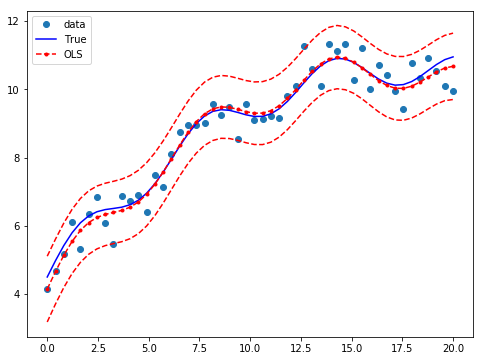

In [51]:
# Draw a plot to compare the true relationship to OLS predictions. 
# Confidence intervals around the predictions are built using the wls_prediction_std command.
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## OLS with dummy variables
We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [62]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e


In [63]:
# Inspect the data:
print(X[:,:])
print(y[:5])
print(groups)
print(dummy[:5,:])


[[ 0.          0.          0.          1.        ]
 [ 0.40816327  0.          0.          1.        ]
 [ 0.81632653  0.          0.          1.        ]
 [ 1.2244898   0.          0.          1.        ]
 [ 1.63265306  0.          0.          1.        ]
 [ 2.04081633  0.          0.          1.        ]
 [ 2.44897959  0.          0.          1.        ]
 [ 2.85714286  0.          0.          1.        ]
 [ 3.26530612  0.          0.          1.        ]
 [ 3.67346939  0.          0.          1.        ]
 [ 4.08163265  0.          0.          1.        ]
 [ 4.48979592  0.          0.          1.        ]
 [ 4.89795918  0.          0.          1.        ]
 [ 5.30612245  0.          0.          1.        ]
 [ 5.71428571  0.          0.          1.        ]
 [ 6.12244898  0.          0.          1.        ]
 [ 6.53061224  0.          0.          1.        ]
 [ 6.93877551  0.          0.          1.        ]
 [ 7.34693878  0.          0.          1.        ]
 [ 7.75510204  0.          0.  

In [56]:
# fit model
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     545.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           6.11e-36
Time:                        19:44:44   Log-Likelihood:                -70.051
No. Observations:                  50   AIC:                             148.1
Df Residuals:                      46   BIC:                             155.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0231      0.067     15.326      0.0

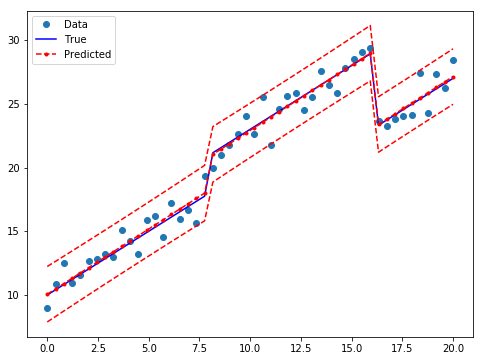

In [57]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

## Regression diagnostics
### Estimate a regression model

In [82]:
%matplotlib inline
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
#url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
#dat = pd.read_csv(url)
dat = pd.read_csv("boston.csv")
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('mv ~ ptratio + rooms + dis', data=dat).fit()

# Inspect the results
print(dat.head())
print(results.summary())

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     217.2
Date:                Th

### Normality of the residuals

In [83]:
# JB test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)


[('Jarque-Bera', 1696.4278708197417),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.5665205918344103),
 ('Kurtosis', 11.405179055594276)]

In [84]:
# omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 207.05576342085843),
 ('Two-tail probability', 1.092476867994284e-45)]

## Heteroskedasticity tests
### Breush-Pagan test:

In [85]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid,results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 23.086783418826176),
 ('p-value', 3.873545560187393e-05),
 ('f-value', 7.9997570842369905),
 ('f p-value', 3.2279527981558966e-05)]

### Goldfeld-Quandt test

In [86]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 3.7973651706661045), ('p-value', 1.4644105101180242e-24)]

In [87]:
help(sms.het_goldfeldquandt)

Help on HetGoldfeldQuandt in module statsmodels.sandbox.stats.diagnostic object:

class HetGoldfeldQuandt(builtins.object)
 |  test whether variance is the same in 2 subsamples
 |  
 |  Parameters
 |  ----------
 |  y : array_like
 |      endogenous variable
 |  x : array_like
 |      exogenous variable, regressors
 |  idx : integer
 |      column index of variable according to which observations are
 |      sorted for the split
 |  split : None or integer or float in intervall (0,1)
 |      index at which sample is split.
 |      If 0<split<1 then split is interpreted as fraction of the observations
 |      in the first sample
 |  drop : None, float or int
 |      If this is not None, then observation are dropped from the middle part
 |      of the sorted series. If 0<split<1 then split is interpreted as fraction
 |      of the number of observations to be dropped.
 |      Note: Currently, observations are dropped between split and
 |      split+drop, where split and drop are the indi